In [2]:
#Load all the required packages/library
import pandas as pd

#!pip install pandasql
import pandasql as ps
from pandasql import sqldf #This is helpful in converting df to a sql query

import numpy as np
import pygsheets as pg #Not required for this use case
import os
import glob
import string #This is useful for string related operations
from datetime import date
from datetime import datetime


!pip install promptlib
import promptlib
from IPython.display import clear_output #This is to clear output

#!pip install -U openpyxl # This is to convert data frame into an Excel file

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26787 sha256=5330897eda868255d65ad45b912d2261d2e46e144903fd2e351fc2fad606e8a3
  Stored in directory: /root/.cache/pip/wheels/ed/8f/46/a383923333728744f01ba24adbd8e364f2cb9470a8b8e5b9ff
Successfully built pandasql


ModuleNotFoundError: ignored

In [ ]:
# The following path has the required Text file
path = 'C:\\Users\\vijai\\OneDrive\\Python for Automation\\Python for Data Analysis\\Python for Data Analysis - 1st Edition Files\\ch02\\usagov_bitly_data2012-03-16-1331923249.txt'

In [ ]:
open(path).readline()

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

In [ ]:
import json #We need to import to load txt files

In [ ]:
records = [json.loads(lines) for lines in open(path)]

In [ ]:
records[0]
type(records[0])

dict

In [3]:
pd.set_option('display.max_rows', 10)

In [4]:
time_zones = [rec['tz'] for rec in records if 'tz' in rec]

NameError: ignored

In [ ]:
from pandas import DataFrame, Series
frame = DataFrame(records)

In [ ]:
frame

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,1.0,America/New_York,MA,A6qOVH,wfLQtf,orofrog,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,http://www.ncbi.nlm.nih.gov/pubmed/22415991,1.331923e+09,1.331823e+09,Danvers,"[42.576698, -70.954903]",NaN,NaN
1,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331923e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,1.0,America/New_York,DC,xxr3Qb,xxr3Qb,bitly,en-US,1.usa.gov,http://t.co/03elZC4Q,http://boxer.senate.gov/en/press/releases/0316...,1.331923e+09,1.331920e+09,Washington,"[38.9007, -77.043098]",NaN,NaN
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,BR,0.0,America/Sao_Paulo,27,zCaLwp,zUtuOu,alelex88,pt-br,1.usa.gov,direct,http://apod.nasa.gov/apod/ap120312.html,1.331923e+09,1.331923e+09,Braz,"[-23.549999, -46.616699]",NaN,NaN
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,0.0,America/New_York,MA,9b6kNl,9b6kNl,bitly,"en-US,en;q=0.8",bit.ly,http://www.shrewsbury-ma.gov/selco/,http://www.shrewsbury-ma.gov/egov/gallery/1341...,1.331923e+09,1.273672e+09,Shrewsbury,"[42.286499, -71.714699]",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3555,Mozilla/4.0 (compatible; MSIE 9.0; Windows NT ...,US,1.0,America/New_York,NJ,e5SvKE,fqPSr9,tweetdeckapi,en,1.usa.gov,direct,http://www.fda.gov/AdvisoryCommittees/Committe...,1.331927e+09,1.301298e+09,Paramus,"[40.9445, -74.07]",NaN,NaN
3556,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...,US,0.0,America/Chicago,OK,jQLtP4,jQLtP4,bitly,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l.php?u=http%3A%2F%2F1...,http://www.okc.gov/PublicNotificationSystem/Fo...,1.331927e+09,1.307530e+09,Oklahoma City,"[35.4715, -97.518997]",NaN,NaN
3557,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331927e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN
3558,GoogleProducer,US,0.0,America/Los_Angeles,CA,zjtI4X,zjtI4X,bitly,NaN,1.usa.gov,direct,http://www.ahrq.gov/qual/qitoolkit/,1.331927e+09,1.327529e+09,Mountain View,"[37.419201, -122.057404]",NaN,NaN


In [ ]:
type(records)

list

In [ ]:
type(frame) # The result is a Data Frame 
type(frame['tz']) # The result is a Series [Note: All Data Frame Columns are Series]

pandas.core.frame.DataFrame

In [ ]:
frame['tz'].value_counts()

America/New_York             1251
                              521
America/Chicago               400
America/Los_Angeles           382
America/Denver                191
                             ... 
Europe/Uzhgorod                 1
Asia/Yekaterinburg              1
Asia/Riyadh                     1
America/Lima                    1
America/Argentina/Cordoba       1
Name: tz, Length: 97, dtype: int64

In [ ]:
frame['tz'].values

array(['America/New_York', 'America/Denver', 'America/New_York', ...,
       'America/Denver', 'America/Los_Angeles', 'America/New_York'],
      dtype=object)

In [ ]:
clean_tz = frame['tz'].fillna('Missing')

In [ ]:
clean_tz[clean_tz == ''] = 'Unknown'

In [ ]:
tz_counts = clean_tz.value_counts(normalize=True)

In [ ]:
frame['tz'].values

array(['America/New_York', 'America/Denver', 'America/New_York', ...,
       'America/Denver', 'America/Los_Angeles', 'America/New_York'],
      dtype=object)

In [ ]:
type(clean_tz)

pandas.core.series.Series

In [ ]:
type(tz_counts)
round(tz_counts*100,2)

America/New_York       35.14
Unknown                14.63
America/Chicago        11.24
America/Los_Angeles    10.73
America/Denver          5.37
                       ...  
Africa/Casablanca       0.03
Europe/Uzhgorod         0.03
Asia/Yekaterinburg      0.03
Asia/Riyadh             0.03
Asia/Kuching            0.03
Name: tz, Length: 98, dtype: float64

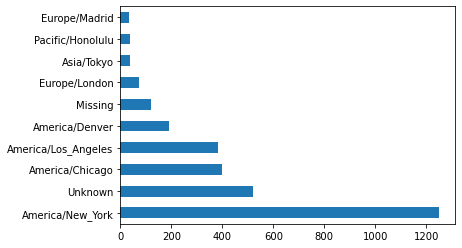

In [ ]:
import matplotlib.pyplot as plt
tz_counts[:10].plot(kind = 'barh', rot = 0)

In [ ]:
type(frame['a'][1])

str

In [ ]:
Series([x.split()[0] for x in frame['a'].dropna()])

0                  Mozilla/5.0
1       GoogleMaps/RochesterNY
2                  Mozilla/4.0
3                  Mozilla/5.0
4                  Mozilla/5.0
                 ...          
3435               Mozilla/4.0
3436               Mozilla/5.0
3437    GoogleMaps/RochesterNY
3438            GoogleProducer
3439               Mozilla/4.0
Length: 3440, dtype: object

In [ ]:
cframe = frame[frame['a'].notnull()]

In [ ]:
operating_system = np.where(cframe['a'].str.contains('Windows'),'Windows','Not Windows')

In [ ]:
type((operating_system))

numpy.ndarray

In [ ]:
type(cframe)

pandas.core.frame.DataFrame

In [ ]:
cframe.groupby(['tz',operating_system]).size().unstack().fillna(0)

,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
...,...,...
Europe/Volgograd,0.0,1.0
Europe/Warsaw,1.0,15.0
Europe/Zurich,4.0,0.0


##****************************************************************************
Stopping Chap 02 here. It is too early to follow through at this point
##****************************************************************************